In [ ]:
pip install catboost optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.1 MB/s eta 0:00:00


# Imports

In [ ]:
# Imports

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from tempfile import mkdtemp
from shutil import rmtree
from sklearn import set_config

# Sklearn preprocessing
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.ensemble import AdaBoostRegressor, VotingRegressor, GradientBoostingRegressor, StackingRegressor, RandomForestRegressor
from sklearn.feature_selection import SelectPercentile, mutual_info_regression, VarianceThreshold, SelectFromModel
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import Ridge, LinearRegression, LogisticRegression
from xgboost import XGBRegressor, XGBClassifier
from sklearn.metrics import make_scorer, mean_squared_error, mean_squared_log_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_selector
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score

# Importing the Data

In [ ]:
import pandas as pd

# Specify the file path to your CSV file
#file_path = '/Users/burquee/code/jupaldev/wif/wif/master_data_NOSHIT.csv'

# Load the CSV file into a DataFrame
#df = pd.read_csv(file_path)

# Display the first few rows of
#df

### Following lines to be used with Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/master_data_NOSHIT.csv')
df

<ipython-input-5-878bd5c2971e>:1: DtypeWarning: Columns (21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/master_data_NOSHIT.csv')


,flight_date,flight_status,departure_airport,departure_timezone,departure_iata,departure_icao,departure_delay,departure_scheduled,arrival_airport,arrival_timezone,...,arrival_airport_weather_condition,arrival_airport_airhelp_score,arrival_airport_on_time_performance,arrival_airport_customer_opinion,departure_airport_airhelp_score,departure_airport_on_time_performance,departure_airport_customer_opinion,airline_airhelp_score,airline_on_time_performance,airline_customer_opinion
0,2024-07-31,landed,Houari Boumediene,Africa/Algiers,ALG,DAAG,64.0,2024-07-31T16:40:00+00:00,Entzheim,Europe/Paris,...,Patchy light rain,NaN,NaN,NaN,NaN,NaN,NaN,7.16,6.7,7.1
1,2024-07-31,landed,Faro,Europe/Lisbon,FAO,LPFR,18.0,2024-07-31T07:50:00+00:00,Schiphol,Europe/Amsterdam,...,Partly cloudy,7.47,7.1,7.9,7.24,7.1,7.3,7.16,6.7,7.1
2,2024-07-31,landed,Orly,Europe/Paris,ORY,LFPO,19.0,2024-07-31T06:15:00+00:00,Ibiza,Europe/Madrid,...,Sunny,7.52,7.2,7.8,7.01,6.7,7.2,7.16,6.7,7.1
3,2024-07-31,landed,Orly,Europe/Paris,ORY,LFPO,34.0,2024-07-31T06:20:00+00:00,Es Senia,Africa/Algiers,...,Patchy rain possible,NaN,NaN,NaN,7.01,6.7,7.2,7.16,6.7,7.1
4,2024-07-31,landed,Orly,Europe/Paris,ORY,LFPO,16.0,2024-07-31T06:20:00+00:00,Houari Boumediene,Africa/Algiers,...,Sunny,NaN,NaN,NaN,7.01,6.7,7.2,7.16,6.7,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418671,2023-09-06,landed,Milano Malpensa,Europe/Rome,MXP,LIMC,9.0,2023-09-06T09:10:00+00:00,Capodichino,Europe/Rome,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
418672,2023-09-06,landed,Milano Malpensa,Europe/Rome,MXP,LIMC,18.0,2023-09-06T09:30:00+00:00,San Pablo,Europe/Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
418673,2023-09-06,landed,Milano Malpensa,Europe/Rome,MXP,LIMC,13.0,2023-09-06T09:50:00+00:00,Barajas,Europe/Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
418674,2023-09-06,landed,Souda,Europe/Athens,CHQ,LGSA,42.0,2023-09-06T10:40:00+00:00,Arlanda,Europe/Stockholm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418676 entries, 0 to 418675
Data columns (total 33 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   flight_date                            418676 non-null  object 
 1   flight_status                          418517 non-null  object 
 2   departure_airport                      418658 non-null  object 
 3   departure_timezone                     418269 non-null  object 
 4   departure_iata                         418676 non-null  object 
 5   departure_icao                         418676 non-null  object 
 6   departure_delay                        403954 non-null  float64
 7   departure_scheduled                    418676 non-null  object 
 8   arrival_airport                        418526 non-null  object 
 9   arrival_timezone                       417922 non-null  object 
 10  arrival_iata                           418676 non-null  

In [ ]:
colab_set_2 = set(list(df.columns))

In [ ]:
set_orginal_df = {  'flight_date',
    'flight_status',
    'departure_airport',
    'departure_timezone',
    'departure_iata',
    'departure_icao',
    'departure_delay',
    'departure_scheduled',
    'arrival_airport',
    'arrival_timezone',
    'arrival_iata',
    'arrival_icao',
    'arrival_delay',
    'arrival_scheduled',
    'airline',
    'airline_iata',
    'airline_icao',
    'flight_number',
    'flight_iata',
    'flight_icao',
    'departure_condition_code',
    'departure_airport_weather_condition',
    'arrival_condition_code',
    'arrival_airport_weather_condition',
    'arrival_airport_airhelp_score',
    'arrival_airport_on_time_performance',
    'arrival_airport_customer_opinion',
    'departure_airport_airhelp_score',
    'departure_airport_on_time_performance',
    'departure_airport_customer_opinion',
    'airline_airhelp_score',
    'airline_on_time_performance',
    'airline_customer_opinion'}

In [ ]:
colab_set_2 - set_orginal_df

set()

# Cleaning-up & Categorizing Delays and Flight Status

In [ ]:
df = df.rename(columns={'departure_iata': 'departure_airport_iata', 'arrival_iata': 'arrival_airport_iata'})

In [ ]:
# Replace NaN values with 0 in the 'departure_delay' column
df['departure_delay'] = df['departure_delay'].fillna(0)

In [ ]:
# Create the new column 'delay_category' based on the condition
df['delay_category'] = (df['departure_delay'] > 30).astype(int)

In [ ]:
# Define the values you want to drop
values_to_drop = ['active', 'scheduled', 'unknown']

# Create a new DataFrame excluding rows with specified values in 'flight_status' column
df = df[~df['flight_status'].isin(values_to_drop)]

# Display value counts for 'flight_status' to confirm removal
df['flight_status'].value_counts()

,count
flight_status,
landed,371067
cancelled,3077
diverted,1054


In [ ]:
# Making sure all flights cancelled & diverted flights are whatever their delay
df.loc[df['flight_status'] == 'cancelled', 'delay_category'] = 1
df.loc[df['flight_status'] == 'diverted', 'delay_category'] = 1

In [ ]:
# checking on proportions in delay category
proportions = df['delay_category'].value_counts(normalize=True)
proportions

,proportion
delay_category,
0,0.830748
1,0.169252


#  Processing Cyclical Data

In [ ]:
df['departure_scheduled'] = pd.to_datetime(df['departure_scheduled'])

In [ ]:
df['arrival_scheduled'] = pd.to_datetime(df['arrival_scheduled'])

In [ ]:
# Extract components
df['departure_year'] = df['departure_scheduled'].dt.year
df['departure_month'] = df['departure_scheduled'].dt.month
df['departure_day'] = df['departure_scheduled'].dt.day
df['departure_hour'] = df['departure_scheduled'].dt.hour
df['departure_minute'] = df['departure_scheduled'].dt.minute
df['departure_day_of_week'] = df['departure_scheduled'].dt.dayofweek  # Monday=0, Sunday=6
df['departure_day_of_year'] = df['departure_scheduled'].dt.dayofyear  # Day of the year

In [ ]:
df['arrival_year'] = df['arrival_scheduled'].dt.year
df['arrival_month'] = df['arrival_scheduled'].dt.month
df['arrival_day'] = df['arrival_scheduled'].dt.day
df['arrival_hour'] = df['arrival_scheduled'].dt.hour
df['arrival_minute'] = df['arrival_scheduled'].dt.minute
df['arrival_day_of_week'] = df['arrival_scheduled'].dt.dayofweek  # Monday=0, Sunday=6
df['arrival_day_of_year'] = df['arrival_scheduled'].dt.dayofyear

In [ ]:
import numpy as np

# Hour of the day for departure
df['departure_hour_sin'] = np.sin(2 * np.pi * df['departure_hour'] / 24)
df['departure_hour_cos'] = np.cos(2 * np.pi * df['departure_hour'] / 24)

# Day of the week for departure
df['departure_day_of_week_sin'] = np.sin(2 * np.pi * df['departure_day_of_week'] / 7)
df['departure_day_of_week_cos'] = np.cos(2 * np.pi * df['departure_day_of_week'] / 7)

# Month of the year for departure
df['departure_month_sin'] = np.sin(2 * np.pi * df['departure_month'] / 12)
df['departure_month_cos'] = np.cos(2 * np.pi * df['departure_month'] / 12)

# Day of the year for departure
df['departure_day_of_year_sin'] = np.sin(2 * np.pi * df['departure_day_of_year'] / 365)
df['departure_day_of_year_cos'] = np.cos(2 * np.pi * df['departure_day_of_year'] / 365)

In [ ]:
# Hour of the day for arrival
df['arrival_hour_sin'] = np.sin(2 * np.pi * df['arrival_hour'] / 24)
df['arrival_hour_cos'] = np.cos(2 * np.pi * df['arrival_hour'] / 24)

# Day of the week for arrival
df['arrival_day_of_week_sin'] = np.sin(2 * np.pi * df['arrival_day_of_week'] / 7)
df['arrival_day_of_week_cos'] = np.cos(2 * np.pi * df['arrival_day_of_week'] / 7)

# Month of the year for arrival
df['arrival_month_sin'] = np.sin(2 * np.pi * df['arrival_month'] / 12)
df['arrival_month_cos'] = np.cos(2 * np.pi * df['arrival_month'] / 12)

# Day of the year for arrival
df['arrival_day_of_year_sin'] = np.sin(2 * np.pi * df['arrival_day_of_year'] / 365)
df['arrival_day_of_year_cos'] = np.cos(2 * np.pi * df['arrival_day_of_year'] / 365)

In [ ]:
# Adding day_of_week column for interpretability
df['departure_day_of_week_name'] = df['departure_scheduled'].dt.day_name()
df['arrival_day_of_week_name'] = df['arrival_scheduled'].dt.day_name()

# Dropping Features

In [ ]:
# Dropping highly correlated or not-impactful-enough features

df = df.drop(columns=[
    'flight_status',            # Data leakage if maintened in
    'departure_delay',          # Data leakage if maintened in
    'arrival_delay',             # Data leakage if maintened in
    'departure_scheduled',      # Datetime columns that have been transformed
    'arrival_scheduled',        # Datetime columns that have been transformed
    "flight_number",
    "flight_icao",
    "flight_iata",
    'flight_date',
    'departure_icao',
    'arrival_icao',
    'airline_icao',
    'airline_iata',
    'departure_condition_code',
    'arrival_condition_code',
    'departure_day_of_week',
    'departure_day_of_week_name',
    'departure_month_cos',
    'arrival_airport_on_time_performance',
    'departure_year',
    'airline_customer_opinion',
    'arrival_year'
])

In [ ]:
# extra droppings to match with preprocess.py
df = df.drop(columns= ['airline_airhelp_score', 'airline_on_time_performance','arrival_day_of_week_name'])

In [ ]:
df = df.drop(columns = ['departure_airport', 'arrival_airport', 'departure_timezone', 'arrival_timezone'])
cat_features = df.select_dtypes(include=['object'])
cat_features

,departure_airport_iata,arrival_airport_iata,airline,departure_airport_weather_condition,arrival_airport_weather_condition
0,ALG,SXB,Transavia,Sunny,Patchy light rain
1,FAO,AMS,Transavia,Sunny,Partly cloudy
2,ORY,IBZ,Transavia,Thundery outbreaks possible,Sunny
3,ORY,ORN,Transavia,Thundery outbreaks possible,Patchy rain possible
4,ORY,ALG,Transavia,Thundery outbreaks possible,Sunny
...,...,...,...,...,...
418670,POZ,PMI,Ryanair,NaN,NaN
418671,MXP,NAP,Ryanair,NaN,NaN
418672,MXP,SVQ,Ryanair,NaN,NaN
418673,MXP,MAD,Ryanair,NaN,NaN


#  Define X and y & Split the Data

In [ ]:
#Seperating data into x and y
X = df.drop(columns=['delay_category'])
y = df.delay_category

In [ ]:
#Split training data
# after stratifying and adding randomness in splitting dataset: np.float64(0.8306458718829853)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=42)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape


# First, split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Then, split the training set further into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

# Display the shapes of the resulting datasets
# X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

# Pipeline of Preprocessed Data - Imputing & Encoding

In [ ]:
weather_conditions = [
    'Sunny',
    'Partly cloudy',
    'Cloudy',
    'Overcast',
    'Mist',
    'Patchy light drizzle',
    'Light drizzle',
    'Patchy rain possible',
    'Light rain',
    'Patchy light rain',
    'Light rain shower',
    'Heavy rain at times',
    'Moderate rain at times',
    'Moderate rain',
    'Heavy rain',
    'Patchy snow possible',
    'Patchy light snow',
    'Thundery outbreaks possible',
    'Patchy light rain with thunder',
    'Moderate or heavy rain shower',
    'Torrential rain shower',
    'Moderate or heavy rain with thunder',
    'Patchy moderate snow',
    'Moderate snow',
    'Patchy light snow with thunder',
    'Moderate or heavy snow showers',
    'Moderate or heavy snow with thunder',
    'Heavy snow',
    'Patchy heavy snow',
    'Light sleet',
    'Light sleet showers',
    'Light snow showers',
    'Light snow',
    'Fog',
    'Blowing snow',
    'Blizzard',
    'Freezing fog',
    'Light freezing rain',
    'Heavy freezing drizzle',
    'Ice pellets',
    'Moderate or heavy sleet'
]


In [ ]:
# Rating columns
rating_cols = [
    'arrival_airport_airhelp_score',
    'arrival_airport_on_time_performance',
    'arrival_airport_customer_opinion',
    'departure_airport_airhelp_score',
    'departure_airport_on_time_performance',
    'departure_airport_customer_opinion',
    'airline_airhelp_score',
    'airline_on_time_performance',
    'airline_customer_opinion'
]

### Imputing Notes

 departure_timezone  should be imputed with constant strategy (36 NA values)

 arrival_airport should be imputed with constant strategy (14 NA values)

 arrival_timezone  should be imputed with constant strategy (155 NA values)

 flight_number should be imputed with constant strategy (112 NA values)


 other columns have no NA values

In [ ]:
# Custom selector to exclude specific columns
def select_numeric_except_ratings(X):
    all_numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
    return all_numeric_cols.difference(rating_cols)

In [ ]:
# Define column transformers
num_transformer = make_pipeline(SimpleImputer(strategy='constant', fill_value=0), MinMaxScaler())
cat_transformer = make_pipeline(SimpleImputer(strategy='constant', fill_value='missing'), OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='if_binary'))
rating_transformer = make_pipeline(SimpleImputer(strategy='median'), MinMaxScaler())
weather_transformer = make_pipeline(OrdinalEncoder(categories=[weather_conditions, weather_conditions]))

# Specific columns that need ordinal encoding
weather_cols = ['departure_airport_weather_condition', 'arrival_airport_weather_condition']

# Update the preprocessor to include the ordinal encoder and the rating columns
preproc_basic = make_column_transformer(
        (num_transformer, select_numeric_except_ratings),
        (cat_transformer, make_column_selector(dtype_include=['object'])),
        (weather_transformer, weather_cols),  # Apply the rank transformer to specific columns
        (rating_transformer, rating_cols)  # Apply median imputation and scaling to rating columns
)
preproc_basic

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 <function select_numeric_except_ratings at 0x79b981d86f80>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEnco...
                                                  SimpleImputer(strategy='median')),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['arrival_airport_airhelp_score',
                                  'arrival_airport_on_time_performance',
                                  'arrival_airport_customer_opinion',
                                  'departure_airport_airhelp_score',
                                  'departure_airport_on_time_performance',
                                  'departure_airport_customer_opinion',
                                  'airline_airhelp_score',
                                  'airline_on_time_performance',
                                  'airline_customer_opinion'])])

# Dummy Model - not needed for our use-case but more useful in regression models

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
dummy_clf = DummyClassifier(strategy="most_frequent")

In [ ]:
# dummy_clf.fit(X_train, y_train)

In [ ]:
# dummy_clf.score(X_test, y_test)

# Pipeline & XGBC Modeling

In [ ]:
# Defining the model
model_XGBC = XGBClassifier(objective='binary:logistic',
                          random_state=42,
                          eval_metric='logloss',
                          learning_rate=0.1,
                           n_estimators=100,
)

print("XGBoost model initialized with adjusted class weights and objective.")

# Create a pipeline that includes both the preprocessing and the model
pipeline = make_pipeline(preproc_basic, model_XGBC)

pipeline

XGBoost model initialized with adjusted class weights and objective.


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  <function select_numeric_except_ratings at 0x79b981d86f80>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='co...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [ ]:
#pipeline.fit(X_train, y_train)

In [ ]:
# score_baseline = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='roc_auc').mean()
# score_baseline

In [ ]:
# pipeline.score(X_test, y_test)

# Cat Booster

In [ ]:
cat_features = X.select_dtypes(include=['object'])
cat_features

,departure_airport_iata,arrival_airport_iata,airline,departure_airport_weather_condition,arrival_airport_weather_condition
0,ALG,SXB,Transavia,Sunny,Patchy light rain
1,FAO,AMS,Transavia,Sunny,Partly cloudy
2,ORY,IBZ,Transavia,Thundery outbreaks possible,Sunny
3,ORY,ORN,Transavia,Thundery outbreaks possible,Patchy rain possible
4,ORY,ALG,Transavia,Thundery outbreaks possible,Sunny
...,...,...,...,...,...
418670,POZ,PMI,Ryanair,NaN,NaN
418671,MXP,NAP,Ryanair,NaN,NaN
418672,MXP,SVQ,Ryanair,NaN,NaN
418673,MXP,MAD,Ryanair,NaN,NaN


In [ ]:
# Label Encoding of Categorical Features
# Since we won't be able to pass the weights to new training data, we decided to give object type of cat features to the model and use Pool feature instead of encoding

# cat_features_names = list(cat_features.columns)
# label_encoder = LabelEncoder()
# for col in cat_features_names:
#     X[col] = label_encoder.fit_transform(X[col])


# # X[cat_features_names] = label_encoder.fit_transform(X[cat_features_names])

#cat_features = X.select_dtypes(include=['int64'])

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 375357 entries, 0 to 418674
Data columns (total 36 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   departure_airport_iata                 375357 non-null  object 
 1   arrival_airport_iata                   375357 non-null  object 
 2   airline                                375357 non-null  object 
 3   departure_airport_weather_condition    287174 non-null  object 
 4   arrival_airport_weather_condition      294964 non-null  object 
 5   arrival_airport_airhelp_score          253779 non-null  float64
 6   arrival_airport_customer_opinion       253779 non-null  float64
 7   departure_airport_airhelp_score        250946 non-null  float64
 8   departure_airport_on_time_performance  250946 non-null  float64
 9   departure_airport_customer_opinion     250946 non-null  float64
 10  departure_month                        375357 non-null  int32

In [ ]:
cat_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 375357 entries, 0 to 418674
Data columns (total 5 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   departure_airport_iata               375357 non-null  object
 1   arrival_airport_iata                 375357 non-null  object
 2   airline                              375357 non-null  object
 3   departure_airport_weather_condition  287174 non-null  object
 4   arrival_airport_weather_condition    294964 non-null  object
dtypes: object(5)
memory usage: 17.2+ MB


In [ ]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
import warnings

warnings.simplefilter('ignore') #if you dont want to print warnings

# Define stratified K-fold cross-validation - stratified is keeping the proportion balanced
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to hold results
roc_aucs = []
oof_preds = np.zeros((X.shape[0], len(np.unique(y))))

for fold, (train_idx, valid_idx) in enumerate(skf.split(X, y)):
    print(f"### Fold {fold + 1} Training ###")

    X_train = X.iloc[train_idx]
    y_train = y.iloc[train_idx]
    X_valid = X.iloc[valid_idx]
    y_valid = y.iloc[valid_idx]

    # Handle missing values in categorical features
    X_train[cat_features.columns] = X_train[cat_features.columns].fillna('Missing') # Replace NaN with 'Missing'
    X_valid[cat_features.columns] = X_valid[cat_features.columns].astype(str) # Convert all to string

    # Prepare the data pools for CatBoost
    X_train_pool = Pool(X_train, y_train, cat_features=list(cat_features.columns))
    X_valid_pool = Pool(X_valid, y_valid, cat_features=list(cat_features.columns))

    gbm = CatBoostClassifier(
        bootstrap_type= 'Bernoulli',
        feature_border_type= 'Uniform',
        one_hot_max_size= 118,
        l2_leaf_reg= 5.18116387044401,
        random_strength= 3.3278713186292395,
        depth= 9,
        model_size_reg= 5.952362327403284,
        min_child_samples= 161,
        leaf_estimation_iterations= 20,
        auto_class_weights= 'None',
        objective='Logloss',
        eval_metric='AUC',
        iterations=5000,
        learning_rate=0.04495126852396992,
        random_seed=777,
        use_best_model=True,
        max_bin=65535,
        task_type="GPU",
        thread_count=-1,
        verbose=1,
        early_stopping_rounds=50
    )

    # Train the model
    gbm.fit(
        X_train_pool,
        eval_set=X_valid_pool,
        verbose=True
    )


    # Predict on the validation set
    pred_valid_proba = gbm.predict_proba(X_valid_pool)[:, 1]

    # Store OOF predictions
    oof_preds[valid_idx] = gbm.predict_proba(X_valid_pool)

    # Calculate ROC AUC for this fold
    roc_auc = roc_auc_score(y_valid, pred_valid_proba)
    roc_aucs.append(roc_auc)

    # Print best test score and best iteration for comparison
    print(f"bestIteration: {gbm.best_iteration_}")
    print(f"Fold {fold + 1} ROC AUC: {roc_auc:.5f}\n")

    break



# Output overall performance
print(f"\nOverall ROC AUC: {np.mean(roc_aucs):.5f} +/- {np.std(roc_aucs):.5f}")

### Fold 1 Training ###


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6517362	best: 0.6517362 (0)	total: 463ms	remaining: 38m 32s
1:	total: 858ms	remaining: 35m 43s
2:	total: 1.27s	remaining: 35m 11s
3:	total: 1.67s	remaining: 34m 47s
4:	total: 2.06s	remaining: 34m 19s
5:	test: 0.6751137	best: 0.6751137 (5)	total: 2.47s	remaining: 34m 13s
6:	total: 2.87s	remaining: 34m 5s
7:	total: 3.27s	remaining: 34m
8:	total: 3.65s	remaining: 33m 46s
9:	total: 4.08s	remaining: 33m 57s
10:	test: 0.6834259	best: 0.6834259 (10)	total: 4.48s	remaining: 33m 51s
11:	total: 4.87s	remaining: 33m 46s
12:	total: 5.27s	remaining: 33m 42s
13:	total: 5.66s	remaining: 33m 36s
14:	total: 6.06s	remaining: 33m 34s
15:	test: 0.6906113	best: 0.6906113 (15)	total: 6.46s	remaining: 33m 31s
16:	total: 6.87s	remaining: 33m 34s
17:	total: 7.26s	remaining: 33m 28s
18:	total: 7.66s	remaining: 33m 27s
19:	total: 8.04s	remaining: 33m 22s
20:	test: 0.6989815	best: 0.6989815 (20)	total: 8.46s	remaining: 33m 27s
21:	total: 8.87s	remaining: 33m 27s
22:	total: 9.29s	remaining: 33m 29s
23:	

In [ ]:
gbm.save_model('model_test_8')

In [ ]:
!pip install shapely
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 34.8 MB/s eta 0:00:00


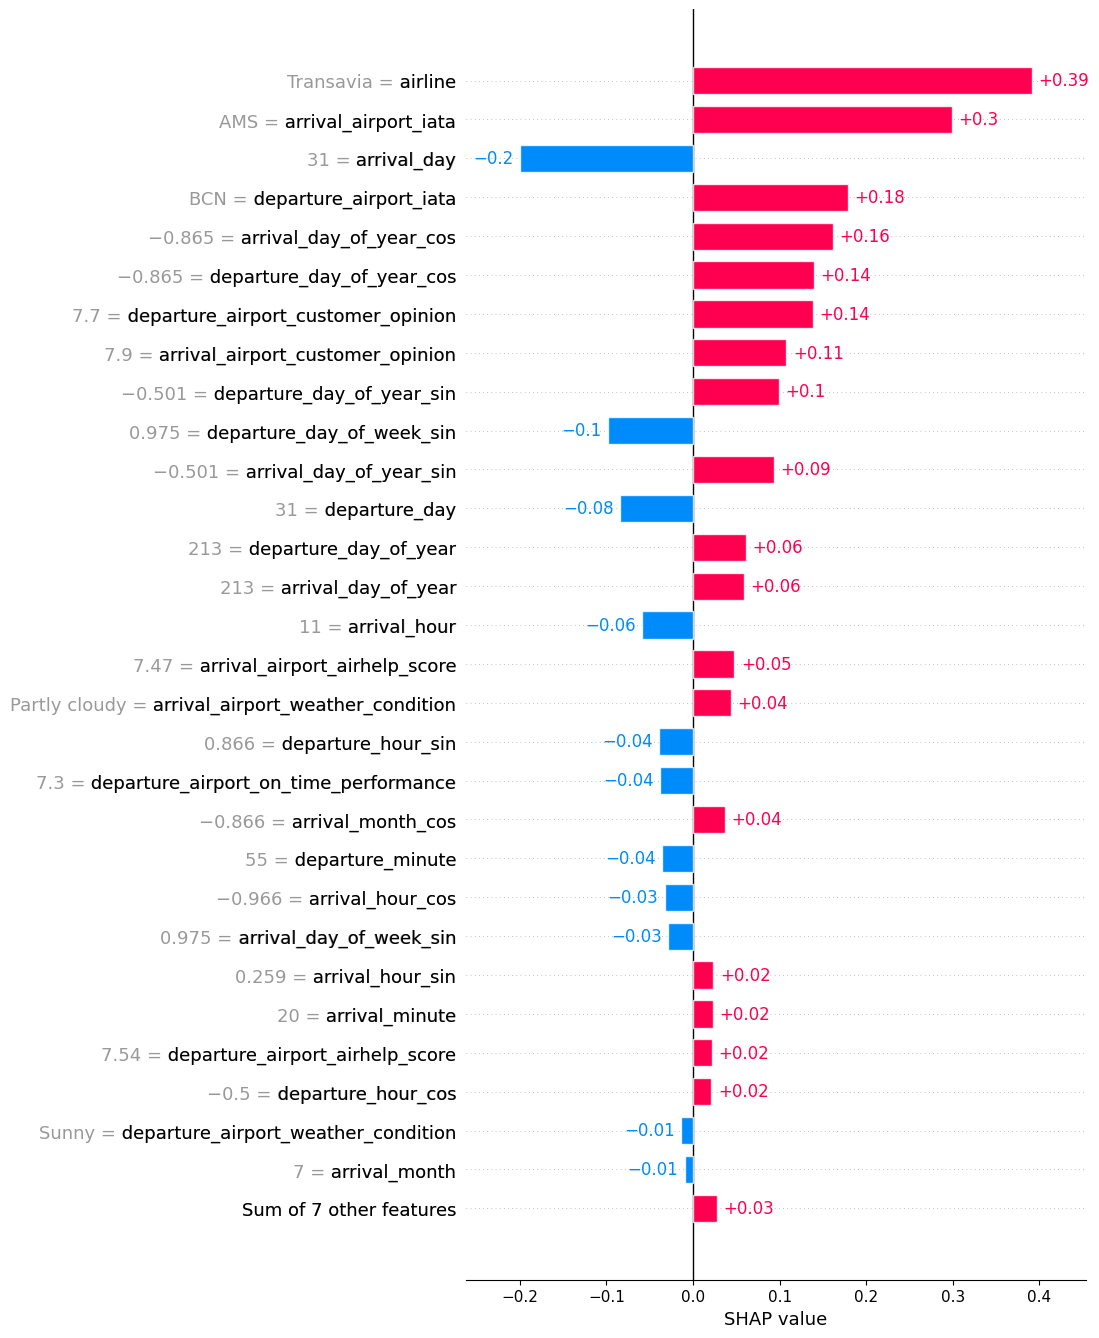

In [ ]:
import shap
shap.initjs();
explainer = shap.Explainer(gbm)
test_row = X.iloc[[41]]
shap_values_one = explainer(test_row)
shap.plots.bar(shap_values_one[0], max_display=30)

In [ ]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
X_oof = oof_preds
y_oof = y
X_train, X_test, y_train, y_test = train_test_split(X_oof, y_oof, test_size=0.2, stratify=y_oof, random_state=42)



0.5474480292200121

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict_proba(X_test)
roc_auc_score(y_test, y_pred)

0.5502345784280432

In [ ]:
# Grid Search for Cat Booster

# import optuna
# import catboost as cb
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import matthews_corrcoef
# from catboost import CatBoostClassifier, Pool

# base_params = {
#     'use_best_model': True,
#     'score_function': 'NewtonCosine',
#     'objective':'Logloss',
#     "eval_metric": "AUC",
#     "task_type": "GPU",
#     "thread_count": -1,
#     "iterations": 5000,
#     "max_bin": 65535,
#     'random_seed': 777,
#     'data_partition': 'FeatureParallel',
# }

# def objective(trial: optuna.Trial) -> float:
#     # Consistent categorical choices
#     # grow_policy_choices = ['SymmetricTree', 'Lossguide']
#     bootstrap_type_choices = ['Bernoulli',  'Poisson']
#     feature_border_type_choices = ['Uniform', 'MinEntropy']
#     auto_class_weights_choices = ['None', 'Balanced']

#     param = {
#         **base_params,
#         # 'grow_policy': trial.suggest_categorical('grow_policy', grow_policy_choices),
#         'bootstrap_type': trial.suggest_categorical('bootstrap_type', bootstrap_type_choices),
#         'feature_border_type': trial.suggest_categorical('feature_border_type', feature_border_type_choices),
#         'one_hot_max_size': trial.suggest_int('one_hot_max_size', 2, 255),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.8),
#         'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 5.0, 3000.0),
#         "random_strength": trial.suggest_float("random_strength", 0.0, 30.0),
#         "depth": trial.suggest_int("depth", 4, 12),
#         'model_size_reg': trial.suggest_float('model_size_reg', 0.1, 30.0),
#         'min_child_samples': trial.suggest_int('min_child_samples', 20, 250),
#         'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations', 5, 20),
#         'auto_class_weights': trial.suggest_categorical('auto_class_weights', auto_class_weights_choices)

#     }

#     # Correct the setting of max_leaves when grow_policy is 'Lossguide'
#     # if param['grow_policy'] == 'Lossguide':
#     #     param['max_leaves'] = trial.suggest_int('max_leaves', 128, 512)
#     #     param['score_function'] = 'NewtonL2'


#     if param['bootstrap_type'] == 'Bayesian':
#         param['bagging_temperature'] = trial.suggest_float('bagging_temperature', 0.5, 2.0)



#     # Split the data into training and validation sets (90% train, 10% validation)
#     X_train, X_valid, y_train, y_valid = train_test_split(X, y.values, test_size=0.1, random_state=42, stratify=y.values)




#         # Handle missing values in categorical features
#     X_train[cat_features.columns] = X_train[cat_features.columns].fillna('Missing') # Replace NaN with 'Missing'
#     X_valid[cat_features.columns] = X_valid[cat_features.columns].astype(str) # Convert all to string

#     X_train_pool = Pool(X_train, y_train, cat_features=list(cat_features.columns))
#     X_valid_pool = Pool(X_valid, y_valid, cat_features=list(cat_features.columns))

#     gbm = cb.CatBoostClassifier(**param)

#     gbm.fit(
#         X=X_train_pool,
#         eval_set=X_valid_pool,
#         verbose=0,
#         early_stopping_rounds=50,
#     )

#     y_pred = gbm.predict_proba(X_valid_pool)[:,1]
#     auc = roc_auc_score(y_valid, y_pred)
#     print(f'ROC: {auc}')
#     return auc

# study = optuna.create_study(
#     # storage=SUPABASE_URL,
#     direction="maximize",
#     study_name="FLY",
#     # load_if_exists=True,
# )
# study.optimize(objective, n_trials=1000)

# print("Number of finished trials: {}".format(len(study.trials)))

# Feature Importance

In [ ]:
pd.DataFrame({'features':X.columns, 'importance':gbm.feature_importances_}).sort_values('importance', ascending=False)

,features,importance
0,departure_airport_iata,5.637217
3,departure_airport_weather_condition,5.515275
2,airline,5.297924
4,arrival_airport_weather_condition,5.202806
13,departure_minute,4.639056
18,arrival_minute,4.614945
5,arrival_airport_airhelp_score,4.421397
28,arrival_hour_sin,3.865740
9,departure_airport_customer_opinion,3.801468
27,departure_day_of_year_cos,3.666581


# Learning Curve

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import learning_curve
# from sklearn.pipeline import make_pipeline

# # Define your model and pipeline as before
# model_LR = LogisticRegression(C=0.1, class_weight=None, solver='lbfgs', max_iter=1000)
# pipeline_LR = make_pipeline(preproc_basic, model_LR)
# # Generate learning curves
# train_sizes, train_scores, test_scores = learning_curve(
#     pipeline_LR,
#     X_train,
#     y_train,
#     cv=5,
#     scoring='roc_auc',
#     n_jobs=-1,
#     train_sizes=np.linspace(0.1, 1.0, 10), # 10 points from 10% to 100% of training data
#     random_state=42
# )
# # Calculate mean and standard deviation of training and test scores
# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# # Plotting the learning curve
# plt.figure(figsize=(8, 6))
# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.1, color="r")
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                  test_scores_mean + test_scores_std, alpha=0.1, color="g")
# plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
# plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
# plt.title("Learning Curve for Logistic Regression")
# plt.xlabel("Training Examples")
# plt.ylabel("roc_auc Score")
# plt.legend(loc="best")
# plt.grid()
# plt.show()

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import GridSearchCV

# # Define the logistic regression model
# model_LR = LogisticRegression(max_iter=1000)  # Keep max_iter high to ensure convergence

# # Create a pipeline with scaling and logistic regression
# pipeline_LR = make_pipeline(preproc_basic, model_LR)

# # Define the parameter grid to search
# param_grid = {
#     'logisticregression__C': [1, 10, 20],  # Regularization strength
#     'logisticregression__solver': ['lbfgs'],  # Different solvers
#     'logisticregression__class_weight': [None, 'balanced'],  # Class weight options
# }

# # Set up GridSearchCV with 5-fold cross-validation and use ROC AUC as the scoring metric
# grid_search = GridSearchCV(pipeline_LR, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# # Run the grid search on the training data
# grid_search.fit(X_train, y_train)

# # Get the best parameters found by the grid search
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print(f"Best Parameters: {best_params}")
# print(f"Best Accuracy Score: {best_score:.2f}")

# Questions

### - Understand git branches and master